<a href="https://colab.research.google.com/github/curtiscu/LYIT/blob/master/Visualisations_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More visualisations

Need to look into things like Poincare plots, and other time related plots...

* https://en.wikipedia.org/wiki/Detrended_fluctuation_analysis
* https://en.wikipedia.org/wiki/Poincar%C3%A9_plot
* https://en.wikipedia.org/wiki/Recurrence_plot

.. this looks very good ..
* https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html



# Setup env


In [0]:
# print all cell output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Google drive access

In [2]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# test, peek at data
! ls -al '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/'

# test, modules from local  'E:\Google Drive\LYIT\Dissertation\modules'
! ls -al '/content/drive/My Drive/LYIT/Dissertation/modules/'

total 35
-rw------- 1 root root 2589 Apr 27 12:01 10_soul-groove10_102_beat_4-4.mid
-rw------- 1 root root 4793 Apr 27 12:01 1_funk-groove1_138_beat_4-4.mid
-rw------- 1 root root 3243 Apr 27 12:01 2_funk-groove2_105_beat_4-4.mid
-rw------- 1 root root 4466 Apr 27 12:01 3_soul-groove3_86_beat_4-4.mid
-rw------- 1 root root 2551 Apr 27 12:01 4_soul-groove4_80_beat_4-4.mid
-rw------- 1 root root 3798 Apr 27 12:01 5_funk-groove5_84_beat_4-4.mid
-rw------- 1 root root 3760 Apr 27 12:01 6_hiphop-groove6_87_beat_4-4.mid
-rw------- 1 root root 1894 Apr 27 12:01 7_pop-groove7_138_beat_4-4.mid
-rw------- 1 root root 2437 Apr 27 12:01 8_rock-groove8_65_beat_4-4.mid
-rw------- 1 root root 3448 Apr 27 12:01 9_soul-groove9_105_beat_4-4.mid
total 34
-rw------- 1 root root 21727 Jun  4 19:53 data_prep.py
drwx------ 2 root root  4096 May 10 13:31 __pycache__
-rw------- 1 root root  8416 Jun  2 21:24 visualizations.py


## Auto reload module

Now using library code I've created and saved to google drive which is automatically pushed to the cloud and made available to the colab env. The autoreload stuff below should help imports to 'reimport' to load changes to the library code.

It's not the quickest/ most reliable, so if in a hurry, brute force loading of changes by restarting the runtime.

In [0]:
# tool to auto reload modules.
%load_ext autoreload

# config to auto-reload all modules, handy to make 
# writing and testing modules much easier.
%autoreload 2

## Imports and accessing lib functions

In [5]:
# install required libs
!pip install mido

     |████████████████████████████████| 61kB 2.0MB/s 


In [6]:
# import my modules
import sys
sys.path.append('/content/drive/My Drive/LYIT/Dissertation/modules/')
import data_prep as dp

LOADING custom module, when: 2020-06-13 21:59:45.004745, module name: data_prep


In [0]:
# imports
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np


# object that provides colours for charts
from itertools import cycle



In [8]:
# testing auto reload of modules 
dp.test_function_call('bling')

Test function called worked! when: 2020-06-13 21:59:45.055114,  param:bling


## Pandas display options

In [0]:
def set_pandas_display_options() -> None:
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 2000
    display.max_colwidth = 1000
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()
#pd.reset_option('all')


## Load some data

In [46]:

file_1 = '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid'
file_7 = '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer7/eval_session/1_funk-groove1_138_beat_4-4.mid'

file_df, f, mtt = dp.load_file(file_1)  # load data

FILE name: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid
    loaded file: <midi file '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid' type 0, 1 tracks, 1300 messages>
    time sig: <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
    tempo: <meta message set_tempo tempo=434783 time=0>
    track count: 1, tracks: [<midi track 'MIDI' 1300 messages>]
    MIDI file type: 0
    > processing track: <midi track 'MIDI' 1300 messages>
    note_on span - first tick: 3 , last tick: 30658 
    good instruments: 6, {36.0: 'Bass Drum 1 (36)', 38.0: 'Acoustic Snare (38)', 42.0: 'Closed Hi Hat (42)', 43.0: 'High Floor Tom (43)', 49.0: 'Crash Cymbal 1 (49)', 51.0: 'Ride Cymbal 1 (51)'}
    bar info - bars in file: 16, bar quantize level: 16.0
    tick info - ticks per time sig beat: 480.0, ticks per quantize bin: 120


In [47]:
file_df.head()
file_df.info()

track_msg_num  total_ticks  note  velocity  \
bar_number bar_beat_number note                                              
1          1               49             0:6            3    49        60   
                           51             0:7            7    51        55   
                           36             0:8           10    36        64   
           3               36            0:14          211    36        57   
                           51            0:16          238    51        31   

                                 beat_offset beat_center  bar_number  \
bar_number bar_beat_number note                                        
1          1               49              3           0           1   
                           51              7           0           1   
                           36             10           0           1   
           3               36            -29         240           1   
                           51             -2         240           1   

                                 bar_beat_number  
bar_number bar_beat_number note                   
1          1               49                  1  
                           51                  1  
                           36                  1  
           3               36                  3  
                           51                  3

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 412 entries, (1, 1, 49) to (16, 16, 42)
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   track_msg_num    412 non-null    string  
 1   total_ticks      412 non-null    int64   
 2   note             412 non-null    int64   
 3   velocity         412 non-null    int64   
 4   beat_offset      412 non-null    int64   
 5   beat_center      412 non-null    category
 6   bar_number       412 non-null    int64   
 7   bar_beat_number  412 non-null    int64   
dtypes: category(1), int64(6), string(1)
memory usage: 25.2 KB


# Do some plotting

## Demo plot code

Lag plot..
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#lag-plot

In [0]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

<Figure size 432x288 with 0 Axes>

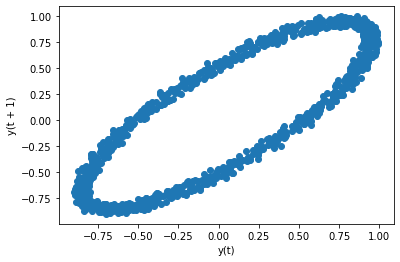

In [49]:
plt.figure()

#spacing = np.linspace(-99 * np.pi, 99 * np.pi, num=1000)
#data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(spacing))

lag_plot(data)


## Lag plots for offsets

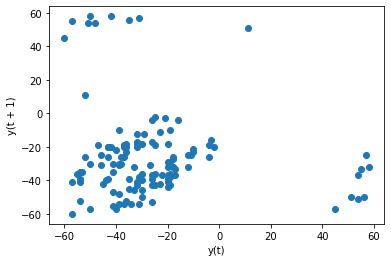

In [50]:
# filter hi-hat notes...
lag_plot(file_df[file_df.index.isin([42], level=2)]['beat_offset'])

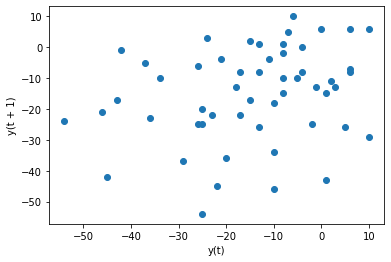

In [51]:
# filter bass drum notes notes...
lag_plot(file_df[file_df.index.isin([36], level=2)]['beat_offset'])

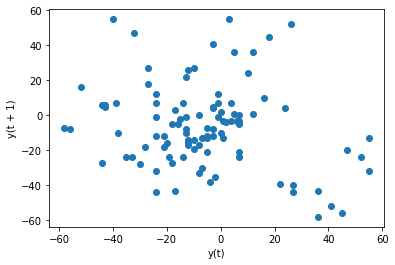

In [52]:
# filter snare notes...
lag_plot(file_df[file_df.index.isin([38], level=2)]['beat_offset'])

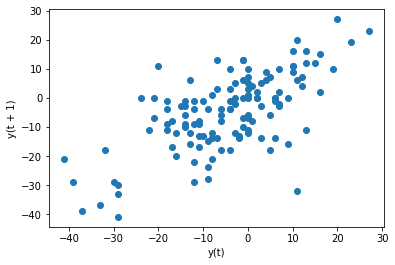

In [53]:
# filter ride notes...
lag_plot(file_df[file_df.index.isin([51], level=2)]['beat_offset'])

## Lag plots for velocity

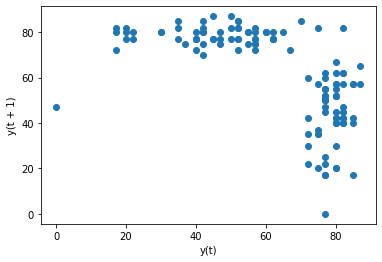

In [54]:
lag_plot(filter_df['velocity'])

<Figure size 432x288 with 0 Axes>

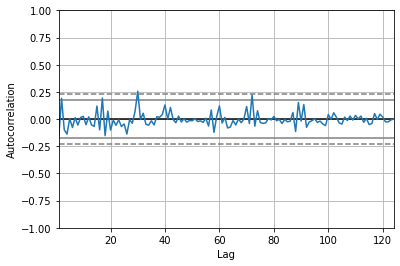

In [55]:

plt.figure()
autocorrelation_plot(filter_df['beat_offset'])